In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
TEST_DIR = "test"
TRAINING_DIR = "training"

## Loading dataset

In [3]:
training_labels_path = os.path.join(TRAINING_DIR, "labels.csv")
train_df = pd.read_csv(training_labels_path, index_col="ImageId")
train_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
2,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
3,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
4,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
5,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921
7046,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023
7047,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120


Total size of the training dataset is:

In [4]:
train_df.shape[0]

7049

Check if all images from labels are present:

In [5]:
all_exist = True
for i in range(1, 7049 + 1):
    if not os.path.exists(os.path.join(TRAINING_DIR, f"{i}.png")):
        all_exist = False
        print(f"Found missing image: {i}.png")
print("All images found!" if all_exist else "Some images not found!")

All images found!


Total size of test dataset is:

In [6]:
test_len = len(os.listdir(TEST_DIR))
test_len

1752

Image Size is 96x96, verifying for both test and training:

In [7]:
for file in os.listdir(TRAINING_DIR):
    if file.endswith(".png"):
        img_path = os.path.join(TRAINING_DIR, file)
        with Image.open(img_path) as img:
            width, height = img.size
            assert width == 96 and height == 96
print("Training images 96x96 size validated")

Training images 96x96 size validated


In [8]:
for file in os.listdir(TEST_DIR):
    if file.endswith(".png"):
        img_path = os.path.join(TRAINING_DIR, file)
        with Image.open(img_path) as img:
            width, height = img.size
            assert width == 96 and height == 96
print("Test images 96x96 size validated")

Test images 96x96 size validated


### Verifying that localization is interpreted correctly

Features availiable:

In [9]:
features = list(map(lambda x: x[:-2], train_df.columns[::2]))
"; ".join(features)

'left_eye_center; right_eye_center; left_eye_inner_corner; left_eye_outer_corner; right_eye_inner_corner; right_eye_outer_corner; left_eyebrow_inner_end; left_eyebrow_outer_end; right_eyebrow_inner_end; right_eyebrow_outer_end; nose_tip; mouth_left_corner; mouth_right_corner; mouth_center_top_lip; mouth_center_bottom_lip'

Taking the first training image data:

In [10]:
first_labels = train_df.iloc[0]
for i, pair in enumerate(zip(first_labels[0::2], first_labels[1::2])):
    print(features[i]," : ", pair)

left_eye_center  :  (66.0335639098, 39.0022736842)
right_eye_center  :  (30.2270075188, 36.4216781955)
left_eye_inner_corner  :  (59.582075188, 39.6474225564)
left_eye_outer_corner  :  (73.1303458647, 39.9699969925)
right_eye_inner_corner  :  (36.3565714286, 37.3894015038)
right_eye_outer_corner  :  (23.4528721805, 37.3894015038)
left_eyebrow_inner_end  :  (56.9532631579, 29.0336481203)
left_eyebrow_outer_end  :  (80.2271278195, 32.2281383459)
right_eyebrow_inner_end  :  (40.2276090226, 29.0023218045)
right_eyebrow_outer_end  :  (16.3563789474, 29.6474706767)
nose_tip  :  (44.4205714286, 57.0668030075)
mouth_left_corner  :  (61.1953082707, 79.9701654135)
mouth_right_corner  :  (28.6144962406, 77.3889924812)
mouth_center_top_lip  :  (43.3126015038, 72.9354586466)
mouth_center_bottom_lip  :  (43.1307067669, 84.4857744361)


In [11]:
from IPython.display import display
from PIL import ImageDraw
import random

In [12]:
def draw_cross(draw, x, y, color, size=5):
    draw.line((x - size, y, x + size, y), fill=color, width=1)
    draw.line((x, y - size, x, y + size), fill=color, width=1)

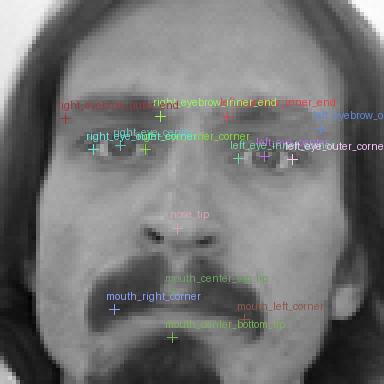

In [13]:
scale = 4
img = Image.open(os.path.join(TRAINING_DIR, "1.png")).convert("RGB")
w, h = img.size
scaled = img.resize((w * scale, h * scale), Image.NEAREST)
draw = ImageDraw.Draw(scaled)

for i, (x, y) in enumerate(zip(first_labels[0::2], first_labels[1::2])):
    color = tuple(random.randint(50, 255) for _ in range(3))
    sx, sy = x * scale, y * scale
    draw_cross(draw, sx, sy, color)
    text_x = sx - 2 * scale
    text_y = sy - 5 * scale
    draw.text((text_x, text_y), features[i], fill=color)

display(scaled)

Left and right here refers to the point of view of the subject.

# Data Cleaning

## Data Types

In [14]:
train_df.dtypes

left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x       float64
m

All the data types are float, which is fine.

## Duplicates

Check if there are duplicates in images:

In [15]:
import hashlib
from collections import defaultdict

Iterating over images in TRAINING_DIR, computing hash and looking for the same hash:

In [16]:
hashes = defaultdict(list)
    
for filename in os.listdir(TRAINING_DIR):
    if filename.endswith(".png"):
        path = os.path.join(TRAINING_DIR, filename)
        with open(path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        hashes[file_hash].append(filename)

duplicates = [files for files in hashes.values() if len(files) > 1]
duplicates

[['1907.png', '1908.png'],
 ['2295.png', '4130.png'],
 ['2298.png', '6420.png'],
 ['2299.png', '4703.png'],
 ['2303.png', '6413.png'],
 ['2304.png', '3573.png'],
 ['2305.png', '4700.png'],
 ['2308.png', '7028.png'],
 ['2311.png', '2925.png'],
 ['2312.png', '7010.png'],
 ['2317.png', '7014.png'],
 ['2318.png', '5263.png'],
 ['2320.png', '4688.png'],
 ['2330.png', '4719.png'],
 ['2333.png', '5818.png'],
 ['2334.png', '2363.png'],
 ['2337.png', '5307.png'],
 ['2340.png', '4171.png'],
 ['2341.png', '4172.png'],
 ['2342.png', '5302.png'],
 ['2344.png', '2975.png'],
 ['2354.png', '6459.png'],
 ['2362.png', '6434.png'],
 ['2365.png', '4754.png'],
 ['2367.png', '6464.png'],
 ['2368.png', '2991.png'],
 ['2374.png', '3628.png'],
 ['2375.png', '3008.png'],
 ['2376.png', '5868.png'],
 ['2379.png', '3022.png'],
 ['2380.png', '3627.png'],
 ['2389.png', '2995.png'],
 ['2391.png', '2998.png'],
 ['2397.png', '4769.png'],
 ['2399.png', '5356.png'],
 ['2403.png', '6498.png'],
 ['2404.png', '4790.png'],
 

In [17]:
total_removed = 0
train_nodup_df = train_df
for dup in duplicates:
    orig = dup[0]
    same = dup[1:]
    same_ids = list(map(lambda x: int(x[:-4]), same))
    train_nodup_df = train_nodup_df.drop(same_ids)
    total_removed += len(same)
print("Total number of removed images: ", total_removed)

Total number of removed images:  555


In [18]:
train_nodup_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
2,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
3,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
4,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
5,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,63.352951,35.671311,33.952078,40.816448,NaN,NaN,NaN,NaN,NaN,NaN,...,48.162462,59.681992,NaN,NaN,NaN,NaN,NaN,NaN,50.367575,70.952324
7043,67.929319,35.846552,28.687820,41.452484,NaN,NaN,NaN,NaN,NaN,NaN,...,50.844585,69.749069,NaN,NaN,NaN,NaN,NaN,NaN,52.446275,81.227824
7044,66.867222,37.356855,30.750926,40.115743,NaN,NaN,NaN,NaN,NaN,NaN,...,43.542112,64.945694,NaN,NaN,NaN,NaN,NaN,NaN,47.555045,79.492551


Image files of the duplicates are kept as further processing will be done based on dataframe, not files in directory.

Iterating over images in TEST_DIR, computing hash and looking for the same hash:

In [19]:
hashes = defaultdict(list)
    
for filename in os.listdir(TEST_DIR):
    if filename.endswith(".png"):
        path = os.path.join(TEST_DIR, filename)
        with open(path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        hashes[file_hash].append(filename)

duplicates = [files for files in hashes.values() if len(files) > 1]
duplicates

[]

As images themselves is all we have for the analysis, we remove the duplicates images:

In [20]:
for dup in duplicates:
    same = dup[1:]
    for file in same:
        file_path = os.path.join(TEST_DIR, file)
        if os.path.exists(file_path):
            os.remove(file_path)
            total_removed += 1
print("Total number of removed images: ", total_removed)

Total number of removed images:  555


Let's also see if there are any duplicates between training and test sets:

In [36]:
hashes = defaultdict(list)
    
for filename in os.listdir(TEST_DIR):
    if filename.endswith(".png"):
        path = os.path.join(TEST_DIR, filename)
        with open(path, "rb") as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        hashes[file_hash].append(path)

for image_id in train_nodup_df.index:
    filename = str(image_id) + ".png"
    path = os.path.join(TRAINING_DIR, filename)
    with open(path, "rb") as f:
        file_hash = hashlib.md5(f.read()).hexdigest()
    hashes[file_hash].append(path) 

duplicates = [files for files in hashes.values() if len(files) > 1]
print(len(duplicates))

293


As testing part is less in size, than training, those duplicates will be removed from training and remain in tests.

In [39]:
# making sure all duplicates are inter sets
print(max([len(d) for d in duplicates]))

2


In [45]:
to_drop = []
for d in duplicates:
    dup = d[0] if TRAINING_DIR in d[0] else d[1]
    _, image_name = dup.split("\\")
    image_id = int(image_name[:-4])
    to_drop.append(image_id)
train_nodup_df = train_nodup_df.drop(index=to_drop)
train_nodup_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
2,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
3,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
4,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
5,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,63.352951,35.671311,33.952078,40.816448,NaN,NaN,NaN,NaN,NaN,NaN,...,48.162462,59.681992,NaN,NaN,NaN,NaN,NaN,NaN,50.367575,70.952324
7043,67.929319,35.846552,28.687820,41.452484,NaN,NaN,NaN,NaN,NaN,NaN,...,50.844585,69.749069,NaN,NaN,NaN,NaN,NaN,NaN,52.446275,81.227824
7044,66.867222,37.356855,30.750926,40.115743,NaN,NaN,NaN,NaN,NaN,NaN,...,43.542112,64.945694,NaN,NaN,NaN,NaN,NaN,NaN,47.555045,79.492551


Now, let's look into the dataset, if there are some duplicates value for the different images:

In [59]:
np.any(train_nodup_df.duplicated())

np.False_

There are no duplicates in data left after removing duplicate images.

## Missing Values

In [46]:
train_nodup_df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      3936
left_eye_inner_corner_y      3936
left_eye_outer_corner_x      3940
left_eye_outer_corner_y      3940
right_eye_inner_corner_x     3939
right_eye_inner_corner_y     3939
right_eye_outer_corner_x     3938
right_eye_outer_corner_y     3938
left_eyebrow_inner_end_x     3937
left_eyebrow_inner_end_y     3937
left_eyebrow_outer_end_x     3982
left_eyebrow_outer_end_y     3982
right_eyebrow_inner_end_x    3937
right_eyebrow_inner_end_y    3937
right_eyebrow_outer_end_x    3970
right_eyebrow_outer_end_y    3970
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          3938
mouth_left_corner_y          3938
mouth_right_corner_x         3937
mouth_right_corner_y         3937
mouth_center_top_lip_x       3932
mouth_center_top_lip_y       3932
mouth_center_bottom_lip_x      33
mouth_center_b

Total number of images with no data missing:

In [47]:
df_full = train_nodup_df.dropna()
df_full

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
2,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
3,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
4,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
5,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,45.805390,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618
2279,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,53.649433,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156
2282,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,53.318891,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522


In [24]:
missing_pct = train_nodup_df.isna().mean() * 100
missing_pct

left_eye_center_x             0.153988
left_eye_center_y             0.153988
right_eye_center_x            0.200185
right_eye_center_y            0.200185
left_eye_inner_corner_x      65.044657
left_eye_inner_corner_y      65.044657
left_eye_outer_corner_x      65.106252
left_eye_outer_corner_y      65.106252
right_eye_inner_corner_x     65.090853
right_eye_inner_corner_y     65.090853
right_eye_outer_corner_x     65.075454
right_eye_outer_corner_y     65.075454
left_eyebrow_inner_end_x     65.060055
left_eyebrow_inner_end_y     65.060055
left_eyebrow_outer_end_x     65.753003
left_eyebrow_outer_end_y     65.753003
right_eyebrow_inner_end_x    65.060055
right_eyebrow_inner_end_y    65.060055
right_eyebrow_outer_end_x    65.568217
right_eyebrow_outer_end_y    65.568217
nose_tip_x                    0.000000
nose_tip_y                    0.000000
mouth_left_corner_x          65.075454
mouth_left_corner_y          65.075454
mouth_right_corner_x         65.060055
mouth_right_corner_y     

In [48]:
missing_eyes = [
    'left_eye_inner_corner_x', 
    'left_eye_inner_corner_y', 
    'left_eye_outer_corner_x', 
    'left_eye_outer_corner_y',
    'right_eye_inner_corner_x',
    'right_eye_inner_corner_y',
    'right_eye_outer_corner_x',
    'right_eye_outer_corner_y',
]
df_missing_eyes = train_nodup_df[train_nodup_df[missing_eyes].isna().any(axis=1)]
df_missing_eyes

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1621,40.458999,40.761635,NaN,NaN,35.552085,39.437385,46.618306,42.578631,NaN,NaN,...,19.534175,55.672760,NaN,NaN,NaN,NaN,29.324415,66.698519,29.324415,72.600096
1644,63.102046,40.587124,NaN,NaN,54.666559,40.177803,71.295616,40.886204,NaN,NaN,...,36.440816,64.122929,61.314974,75.798050,29.673104,74.023968,44.624113,77.933528,45.114863,79.831186
1653,43.312994,39.441219,20.132056,39.410208,38.696963,39.654267,49.344689,39.828861,NaN,NaN,...,19.219701,57.654087,42.073749,70.457936,19.297439,67.656085,26.056623,71.419578,25.943341,72.577576
1655,66.983855,37.191636,30.778167,27.431834,NaN,NaN,76.579801,40.116137,38.34946,30.472663,...,47.356172,54.676425,60.910345,70.723153,18.179873,60.403659,41.001999,67.490500,38.801970,73.222801
1686,65.153204,39.850963,30.073522,40.311816,NaN,NaN,72.418622,40.836359,NaN,NaN,...,48.408086,59.520387,66.747711,81.967816,32.127888,84.451582,50.412462,81.977636,49.874749,83.356986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,63.352951,35.671311,33.952078,40.816448,NaN,NaN,NaN,NaN,NaN,NaN,...,48.162462,59.681992,NaN,NaN,NaN,NaN,NaN,NaN,50.367575,70.952324
7043,67.929319,35.846552,28.687820,41.452484,NaN,NaN,NaN,NaN,NaN,NaN,...,50.844585,69.749069,NaN,NaN,NaN,NaN,NaN,NaN,52.446275,81.227824
7044,66.867222,37.356855,30.750926,40.115743,NaN,NaN,NaN,NaN,NaN,NaN,...,43.542112,64.945694,NaN,NaN,NaN,NaN,NaN,NaN,47.555045,79.492551


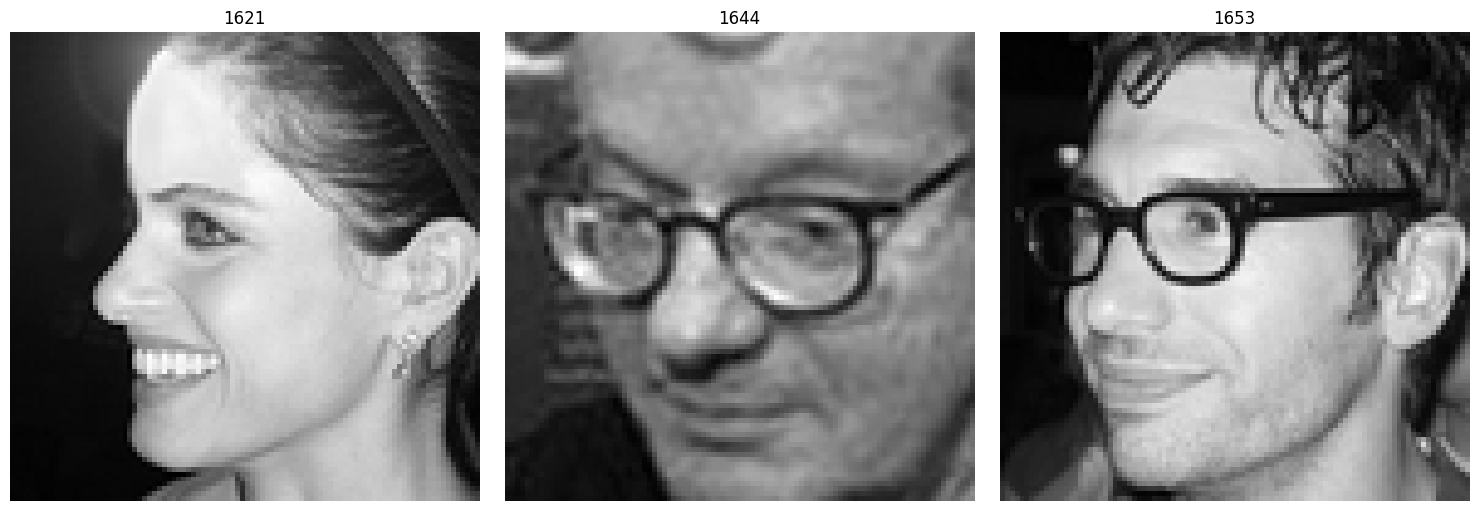

In [26]:
image_ids = df_missing_eyes.index[:3]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, img_id in zip(axes, image_ids):
    img_path = f"{TRAINING_DIR}/{img_id}.png"
    img = Image.open(img_path).convert('L')
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(img_id)

plt.tight_layout()
plt.show()

In [49]:
missing_mouth = [
    'mouth_left_corner_x',
    'mouth_left_corner_y',
    'mouth_right_corner_x',
    'mouth_right_corner_y',
    'mouth_center_top_lip_x',
    'mouth_center_top_lip_y',
]
df_missing_mouth = train_nodup_df[train_nodup_df[missing_mouth].isna().any(axis=1)]
df_missing_mouth

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1621,40.458999,40.761635,NaN,NaN,35.552085,39.437385,46.618306,42.578631,NaN,NaN,...,19.534175,55.672760,NaN,NaN,NaN,NaN,29.324415,66.698519,29.324415,72.600096
1725,68.202647,34.199777,26.483018,39.770241,61.393445,36.617440,77.810266,32.665826,35.127174,39.375337,...,54.203092,69.458009,67.78458,81.307937,37.514698,86.559143,NaN,NaN,NaN,NaN
1732,68.557396,43.293641,24.645775,35.182189,60.659403,45.123292,84.658323,45.397740,37.544814,40.244223,...,33.374127,79.750110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1738,65.930159,40.315344,33.499471,33.760847,59.697354,40.174603,73.128042,44.356614,40.154497,35.831746,...,43.720333,57.682540,NaN,NaN,NaN,NaN,42.744671,74.489796,42.572940,75.195767
1748,75.007892,33.742815,8.472983,40.022514,61.682968,40.396306,91.515526,35.143287,23.025937,44.258819,...,47.351880,87.587970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,63.352951,35.671311,33.952078,40.816448,NaN,NaN,NaN,NaN,NaN,NaN,...,48.162462,59.681992,NaN,NaN,NaN,NaN,NaN,NaN,50.367575,70.952324
7043,67.929319,35.846552,28.687820,41.452484,NaN,NaN,NaN,NaN,NaN,NaN,...,50.844585,69.749069,NaN,NaN,NaN,NaN,NaN,NaN,52.446275,81.227824
7044,66.867222,37.356855,30.750926,40.115743,NaN,NaN,NaN,NaN,NaN,NaN,...,43.542112,64.945694,NaN,NaN,NaN,NaN,NaN,NaN,47.555045,79.492551


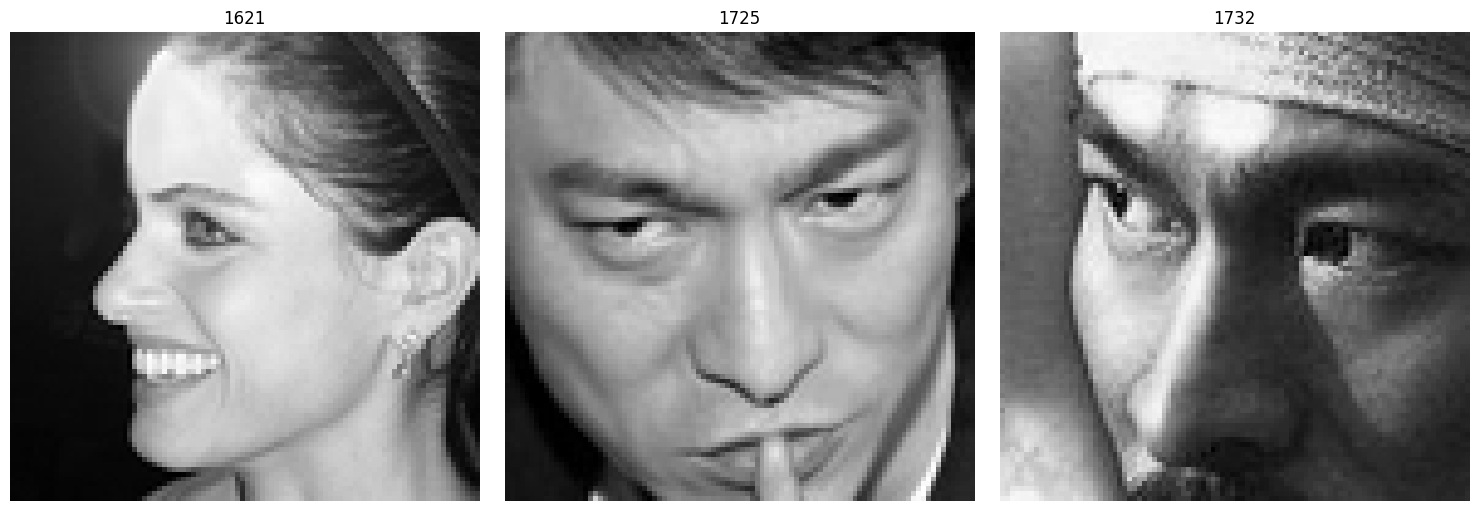

In [50]:
image_ids = df_missing_mouth.index[:3]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, img_id in zip(axes, image_ids):
    img_path = f"{TRAINING_DIR}/{img_id}.png"
    img = Image.open(img_path).convert('L')
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(img_id)

plt.tight_layout()
plt.show()

As can be seen, missing values actually mean that such keypoint is not present, therefore we keep them and will see if CNN will learn. We will substitute NAs with zeroes.

In [60]:
train_nodup_df = train_nodup_df.fillna(0.0)
train_nodup_df.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

## Augmentation

In [61]:
df_full.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [71]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import albumentations as A

SEED = 41

random.seed(SEED)
np.random.seed(SEED)

aug_folder = "augmented/"
os.makedirs(aug_folder, exist_ok=True)

keypoint_cols = [
    'left_eye_center', 'right_eye_center',
    'left_eye_inner_corner', 'left_eye_outer_corner',
    'right_eye_inner_corner', 'right_eye_outer_corner',
    'left_eyebrow_inner_end', 'left_eyebrow_outer_end',
    'right_eyebrow_inner_end', 'right_eyebrow_outer_end',
    'nose_tip',
    'mouth_left_corner', 'mouth_right_corner',
    'mouth_center_top_lip', 'mouth_center_bottom_lip'
]

def extract_keypoints(row):
    kpts = []
    for feat in keypoint_cols:
        x = row[f"{feat}_x"]
        y = row[f"{feat}_y"]
        kpts.append([x, y])
    return kpts

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=0, p=0.5),
], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False), seed=SEED)

aug_rows = []

for img_id, row in df_full.iterrows():
    img_path = os.path.join(TRAINING_DIR, f"{img_id}.png")
    image = np.array(Image.open(img_path).convert('RGB'))

    keypoints = extract_keypoints(row)

    augmented = transform(image=image, keypoints=keypoints)
    img_aug = Image.fromarray(augmented['image'])
    kpts_aug = augmented['keypoints']

    new_img_name = f"aug_{img_id}.png"
    save_path = os.path.join(aug_folder, new_img_name)
    img_aug.save(save_path)

    kpt_dict = {}
    for feat, (x, y) in zip(keypoint_cols, kpts_aug):
        kpt_dict[f"{feat}_x"] = x
        kpt_dict[f"{feat}_y"] = y
    kpt_dict['ImageId'] = new_img_name[:-4]
    aug_rows.append(kpt_dict)

df_aug = pd.DataFrame(aug_rows)
df_aug.set_index('ImageId', inplace=True)
df_aug

c:\Users\nidob\Desktop\fiit-stuff\ZS 2025-2026\ZNEUS\ZNEUS-25-FacialKeypoints\venv\Lib\site-packages\albumentations\core\validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
aug_1,29.476080,31.039267,65.921631,38.603836,35.722046,33.479801,22.120859,29.982870,59.530758,37.819443,...,45.806915,54.652466,22.466402,72.167267,55.695965,78.824127,42.327942,70.367683,39.172993,81.630684
aug_2,26.961479,43.196983,57.527771,27.377619,32.059731,41.173286,21.673470,46.984806,52.388199,30.761497,...,50.285995,55.203110,51.519012,77.431213,70.721344,68.210953,57.800323,67.819550,65.293152,81.115868
aug_3,29.942947,34.909641,64.096207,34.909641,35.588001,36.320969,24.015579,36.320969,57.321896,36.320969,...,47.442738,53.538948,34.177052,73.014313,61.273685,72.732002,47.725052,70.191788,47.725052,78.659370
aug_4,65.225739,37.261772,32.023094,37.261772,60.003338,39.127178,72.314713,38.380966,37.618645,38.754116,...,51.885078,54.166538,65.598885,72.703720,37.245495,74.195480,50.303165,70.091690,51.561184,78.268379
aug_5,66.725304,39.621262,32.244808,38.042030,58.565891,39.621262,72.515930,39.884468,36.982380,39.094852,...,43.299534,64.889519,60.671410,77.523239,31.191755,76.997299,44.962749,73.707390,44.227142,86.871162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aug_2278,67.180382,35.816372,33.239956,34.921932,59.347973,37.000904,72.667900,37.097599,39.404350,36.589943,...,45.805389,60.065395,64.397606,73.248390,35.446430,74.014748,48.708626,76.760849,48.559612,77.335617
aug_2279,66.902702,38.495312,26.711832,34.808823,59.590347,39.088135,75.425720,40.725616,34.737385,36.549412,...,51.867344,63.086094,63.108303,81.272263,24.235847,78.658760,44.774441,81.732010,45.163681,82.839134
aug_2282,30.402441,35.425079,66.474625,34.363594,36.580849,36.911163,23.873299,37.032475,58.473457,35.871513,...,44.190781,60.694473,30.006887,75.265015,72.753738,75.134933,47.966579,76.851997,49.794949,87.622681


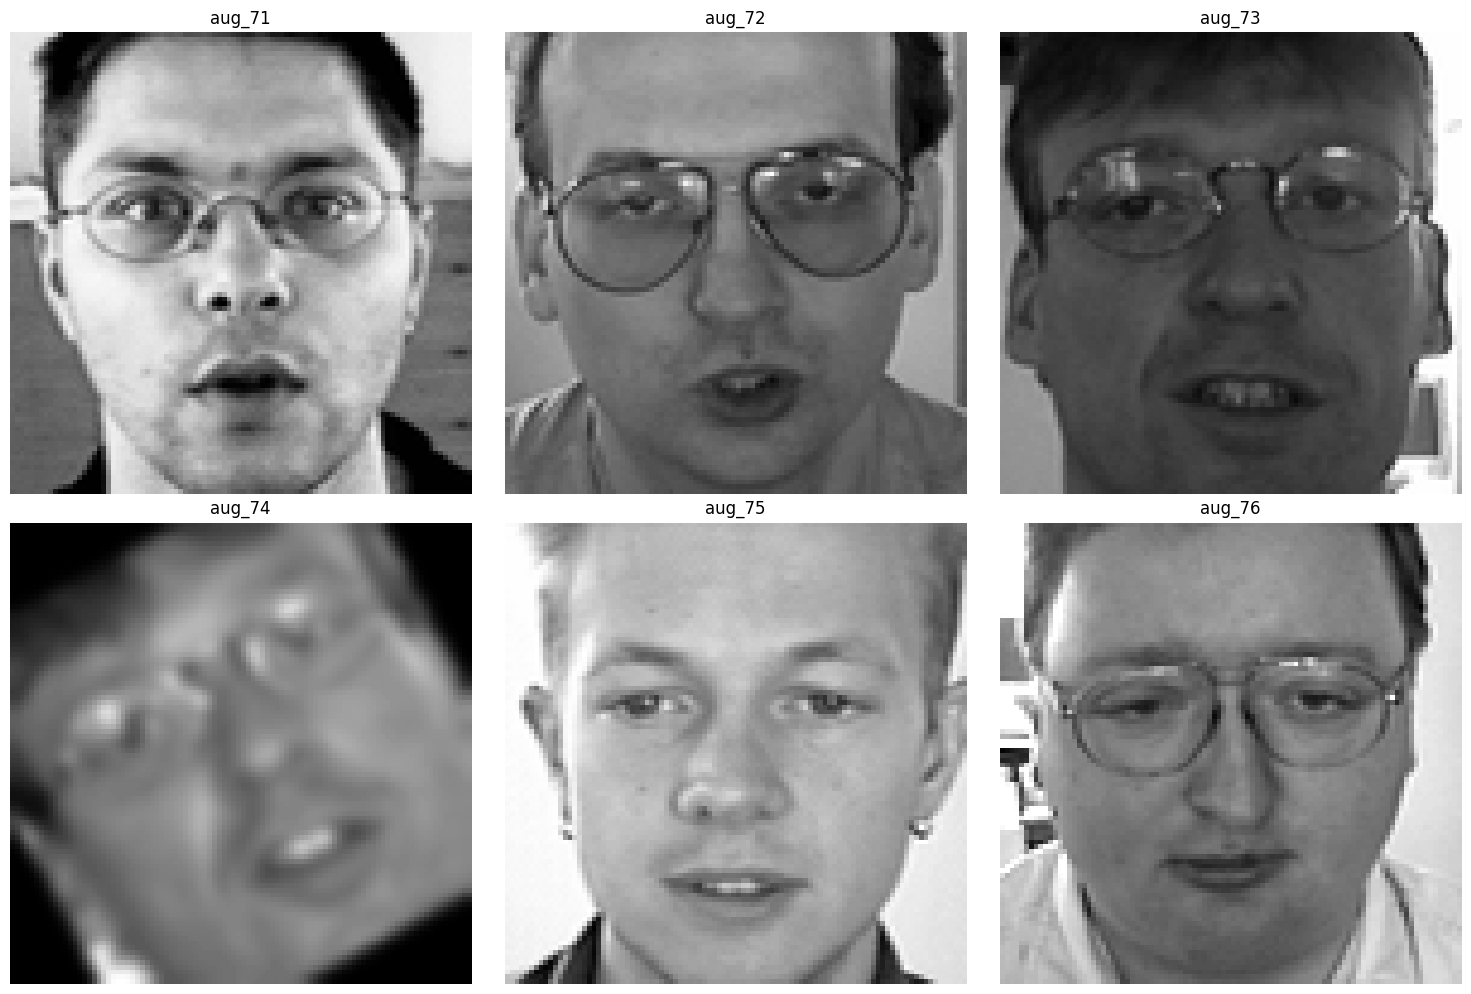

In [72]:
import matplotlib.pyplot as plt
from PIL import Image

image_ids = df_aug.index[70:76]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, img_id in zip(axes, image_ids):
    img_path = f"augmented/{img_id}.png"
    img = Image.open(img_path).convert('L')
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(img_id)

plt.tight_layout()
plt.show()

Verifying that coordinates are shifted appropriately:

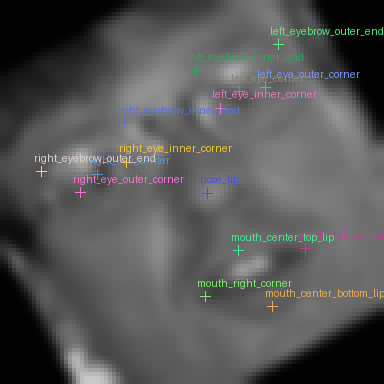

In [73]:
scale = 4
img_id = 74
img = Image.open(os.path.join("augmented", f"aug_{img_id}.png")).convert("RGB")
# img = Image.open(os.path.join("training", f"{img_id}.png")).convert("RGB")

w, h = img.size
scaled = img.resize((w * scale, h * scale), Image.NEAREST)
draw = ImageDraw.Draw(scaled)
labels = df_aug.iloc[img_id - 1]


for i, (x, y) in enumerate(zip(labels[0::2], labels[1::2])):
    color = tuple(random.randint(50, 255) for _ in range(3))
    sx, sy = x * scale, y * scale
    draw_cross(draw, sx, sy, color)
    text_x = sx - 2 * scale
    text_y = sy - 5 * scale
    draw.text((text_x, text_y), features[i], fill=color)

display(scaled)

In [76]:
train_final_df = pd.concat([train_nodup_df, df_aug], axis=0)
train_final_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
ImageId,,,,,,,,,,,,,,,,,,,,,
1,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
2,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
3,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
4,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
5,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aug_2278,67.180382,35.816372,33.239956,34.921932,59.347973,37.000904,72.667900,37.097599,39.404350,36.589943,...,45.805389,60.065395,64.397606,73.248390,35.446430,74.014748,48.708626,76.760849,48.559612,77.335617
aug_2279,66.902702,38.495312,26.711832,34.808823,59.590347,39.088135,75.425720,40.725616,34.737385,36.549412,...,51.867344,63.086094,63.108303,81.272263,24.235847,78.658760,44.774441,81.732010,45.163681,82.839134
aug_2282,30.402441,35.425079,66.474625,34.363594,36.580849,36.911163,23.873299,37.032475,58.473457,35.871513,...,44.190781,60.694473,30.006887,75.265015,72.753738,75.134933,47.966579,76.851997,49.794949,87.622681


In [77]:
train_final_df.to_csv("train_final.csv")

Hash is computed for later verification of identical datasets used in training:

In [78]:
path = "train_final.csv"
with open(path, "rb") as f:
    file_hash = hashlib.md5(f.read()).hexdigest()
print(file_hash)

60e5ef3b5eea20f1e94718a84ddf7614
